# Create Noisy Datasets

## Install libraries

In [ ]:
import os, sys
from google.colab import drive

drive.mount('/content/drive')
nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -c "import torch; print(torch.__version__)"

1.12.0+cu113


In [ ]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274491 sha256=04ff89d0a11cf38384f539f78852f7ec64f5c6d69f5c7244a74157a952755590
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 51 kB 202 kB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.14-cp37-cp37m-linux_x86_64.whl size=497879 sha256=5ee59c93569aba8b500620c6587922c60ca2a79cc72e2f0cd2768498317f8c4e
  Stored in directory: /root/.cache/pip/wheels/3c/aa/62/db0259eae2abce84f1ee2cf1c531bba683aab4bf79054172f8
Successfully built torch-sparse
Look

In [ ]:
!pip install --target=$nb_path torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install --target=$nb_path torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install --target=$nb_path torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274491 sha256=99a6ae8874937841844ae4a74ea8cf23e955d45f4b3c74ba3f8ba3c9e4158d10
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 51 kB 189 kB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.14-cp37-cp37m-linux_x86_64.whl size=497879 sha256=0281945385c6aa309e67aba28feaea2e4067ef6bec750e5768ff06564237bc7d
  Stored in directory: /root/.cache/pip/wheels/3c/aa/62/db0259eae2abce84f1ee2cf1c531bba683aab4bf79054172f8
Successfully built torch-sparse
Look

## IMDB dataset

### Import data

In [1]:
from torch_geometric.datasets import IMDB

dataset = IMDB(root='./data/imdb')

In [2]:
print('Dataset:', dataset)

print('Number of graphs:', len(dataset))

data = dataset[0]
print(data)

num_classes = len(data['movie'].y.unique())
print('Number of classes:', num_classes)
print('Classes:', data['movie'].y.unique())

Dataset: IMDB()
Number of graphs: 1
HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278]
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)
Number of classes: 3
Classes: tensor([0, 1, 2])


### Movie

In [3]:
data['movie'].x.unique()

tensor([0., 1., 2., 3., 4., 5.])

In [4]:
data['movie'].x.unique().size()

torch.Size([6])

In [5]:
arr = data['movie'].x.detach().numpy()
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
bins = data['movie'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [7]:
import numpy as np

hist_movie = np.histogram(arr, bins=bins)
hist_movie

(array([13089173,    25585,     1429,      134,       24,        3]),
 array([0., 1., 2., 3., 4., 5., 6.]))

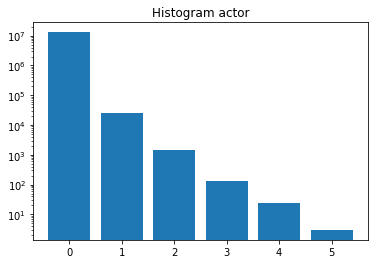

In [9]:
import matplotlib.pyplot as plt

_ = plt.bar(hist_movie[1][:-1], hist_movie[0], log=True)
plt.title("Histogram actor")
plt.show()

### Director

In [10]:
data['director'].x.unique()

tensor([0.0000, 0.0455, 0.0556, 0.0625, 0.0714, 0.0769, 0.0833, 0.0909, 0.1000,
        0.1111, 0.1250, 0.1364, 0.1429, 0.1538, 0.1667, 0.1818, 0.1875, 0.2000,
        0.2143, 0.2222, 0.2308, 0.2500, 0.2727, 0.2857, 0.3000, 0.3333, 0.3750,
        0.4000, 0.4167, 0.4286, 0.4444, 0.4545, 0.5000, 0.5714, 0.6000, 0.6250,
        0.6667, 0.7143, 0.7500, 0.8000, 0.8571, 1.0000, 1.2500, 1.3333, 1.5000,
        2.0000, 3.0000, 4.0000, 5.0000])

In [11]:
arr = data['director'].x.detach().numpy()
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
bins = data['director'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0,
 0.04545454680919647,
 0.0555555559694767,
 0.0625,
 0.0714285746216774,
 0.07692307978868484,
 0.0833333358168602,
 0.09090909361839294,
 0.10000000149011612,
 0.1111111119389534,
 0.125,
 0.13636364042758942,
 0.1428571492433548,
 0.1538461595773697,
 0.1666666716337204,
 0.1818181872367859,
 0.1875,
 0.20000000298023224,
 0.2142857164144516,
 0.2222222238779068,
 0.23076923191547394,
 0.25,
 0.27272728085517883,
 0.2857142984867096,
 0.30000001192092896,
 0.3333333432674408,
 0.375,
 0.4000000059604645,
 0.4166666567325592,
 0.4285714328289032,
 0.4444444477558136,
 0.4545454680919647,
 0.5,
 0.5714285969734192,
 0.6000000238418579,
 0.625,
 0.6666666865348816,
 0.7142857313156128,
 0.75,
 0.800000011920929,
 0.8571428656578064,
 1.0,
 1.25,
 1.3333333730697632,
 1.5,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0]

In [13]:
import numpy as np

hist = np.histogram(arr, bins=bins)
hist

(array([6354562,     227,      88,     161,     137,     174,     362,
            180,     474,     403,    1069,      13,     957,      38,
           1244,      21,       5,    1864,       5,      75,       5,
           2602,       7,     129,      16,    2698,      23,     184,
              2,      22,       6,       2,    4101,       5,      23,
              2,     323,       3,      31,       9,       1,    7541,
              2,      11,      25,     453,      46,      13,       2]),
 array([0.        , 0.04545455, 0.05555556, 0.0625    , 0.07142857,
        0.07692308, 0.08333334, 0.09090909, 0.1       , 0.11111111,
        0.125     , 0.13636364, 0.14285715, 0.15384616, 0.16666667,
        0.18181819, 0.1875    , 0.2       , 0.21428572, 0.22222222,
        0.23076923, 0.25      , 0.27272728, 0.2857143 , 0.30000001,
        0.33333334, 0.375     , 0.40000001, 0.41666666, 0.42857143,
        0.44444445, 0.45454547, 0.5       , 0.5714286 , 0.60000002,
        0.625     , 0.666

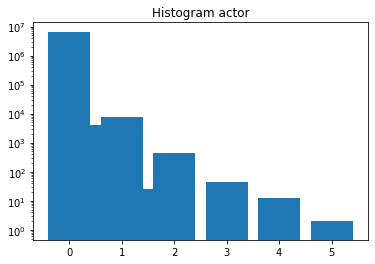

In [14]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram actor")
plt.show()

### Actor

In [15]:
data['actor'].x.unique()

tensor([0.0000, 0.0192, 0.0222, 0.0250, 0.0286, 0.0294, 0.0312, 0.0323, 0.0333,
        0.0345, 0.0357, 0.0370, 0.0385, 0.0400, 0.0417, 0.0435, 0.0444, 0.0455,
        0.0476, 0.0500, 0.0526, 0.0556, 0.0571, 0.0577, 0.0588, 0.0625, 0.0645,
        0.0667, 0.0690, 0.0714, 0.0741, 0.0750, 0.0769, 0.0800, 0.0833, 0.0857,
        0.0870, 0.0882, 0.0889, 0.0909, 0.0938, 0.0952, 0.0962, 0.0968, 0.1000,
        0.1034, 0.1053, 0.1071, 0.1111, 0.1143, 0.1154, 0.1176, 0.1200, 0.1250,
        0.1290, 0.1304, 0.1333, 0.1364, 0.1379, 0.1429, 0.1471, 0.1481, 0.1500,
        0.1538, 0.1562, 0.1579, 0.1600, 0.1667, 0.1739, 0.1765, 0.1818, 0.1875,
        0.1905, 0.1923, 0.1935, 0.2000, 0.2059, 0.2105, 0.2143, 0.2174, 0.2222,
        0.2308, 0.2353, 0.2381, 0.2500, 0.2609, 0.2632, 0.2667, 0.2727, 0.2778,
        0.2800, 0.2857, 0.3000, 0.3077, 0.3125, 0.3182, 0.3333, 0.3571, 0.3636,
        0.3684, 0.3750, 0.4000, 0.4286, 0.4444, 0.4545, 0.5000, 0.5556, 0.5714,
        0.6000, 0.6250, 0.6667, 0.7143, 

In [16]:
arr = data['actor'].x.detach().numpy()
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
bins = data['director'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0,
 0.04545454680919647,
 0.0555555559694767,
 0.0625,
 0.0714285746216774,
 0.07692307978868484,
 0.0833333358168602,
 0.09090909361839294,
 0.10000000149011612,
 0.1111111119389534,
 0.125,
 0.13636364042758942,
 0.1428571492433548,
 0.1538461595773697,
 0.1666666716337204,
 0.1818181872367859,
 0.1875,
 0.20000000298023224,
 0.2142857164144516,
 0.2222222238779068,
 0.23076923191547394,
 0.25,
 0.27272728085517883,
 0.2857142984867096,
 0.30000001192092896,
 0.3333333432674408,
 0.375,
 0.4000000059604645,
 0.4166666567325592,
 0.4285714328289032,
 0.4444444477558136,
 0.4545454680919647,
 0.5,
 0.5714285969734192,
 0.6000000238418579,
 0.625,
 0.6666666865348816,
 0.7142857313156128,
 0.75,
 0.800000011920929,
 0.8571428656578064,
 1.0,
 1.25,
 1.3333333730697632,
 1.5,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0]

In [18]:
import numpy as np

hist = np.histogram(arr, bins=bins)
hist

(array([16046477,     2088,      964,     1407,     1075,      940,
            1180,     1228,     2093,     2230,     2780,       14,
            3100,      175,     3862,      149,       20,     4499,
              20,      280,       35,     5379,       23,      332,
              38,     6546,       37,      439,        0,       52,
               8,        1,     9373,        5,       58,        1,
             614,        5,       77,       14,        0,    18991,
               0,       18,       67,     1128,      114,       22,
               4]),
 array([0.        , 0.04545455, 0.05555556, 0.0625    , 0.07142857,
        0.07692308, 0.08333334, 0.09090909, 0.1       , 0.11111111,
        0.125     , 0.13636364, 0.14285715, 0.15384616, 0.16666667,
        0.18181819, 0.1875    , 0.2       , 0.21428572, 0.22222222,
        0.23076923, 0.25      , 0.27272728, 0.2857143 , 0.30000001,
        0.33333334, 0.375     , 0.40000001, 0.41666666, 0.42857143,
        0.44444445, 0.454545

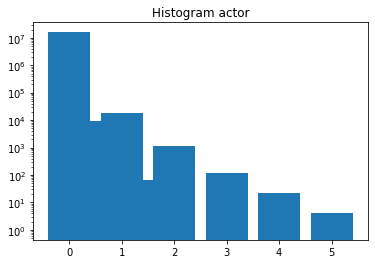

In [19]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram actor")
plt.show()

### Create dummy entities

According to the histograms, the distribution of the values of the initial embeddings of each entity are very similar. Thats why we are going to use the distribution of the `movie` entity as baseline to generate embeddings for 2 dummy entities.

In [20]:
hist_movie

(array([13089173,    25585,     1429,      134,       24,        3]),
 array([0., 1., 2., 3., 4., 5., 6.]))

In [21]:
weights = hist_movie[0]/np.sum(hist_movie[0])
weights

array([9.97928158e-01, 1.95061918e-03, 1.08948009e-04, 1.02162584e-05,
       1.82977762e-06, 2.28722202e-07])

In [22]:
data['movie'].x.size()

torch.Size([4278, 3066])

In [23]:
data['director'].x.size()

torch.Size([2081, 3066])

In [24]:
data['actor'].x.size()

torch.Size([5257, 3066])

In [25]:
emd_size = 3066
ent_1_len = 3000
ent_2_len = 2000

In [26]:
ent_1 = [[np.random.choice(np.arange(6), p=weights) for i in range(emd_size)] for j in range(ent_1_len)]

In [27]:
ent_2 = [[np.random.choice(np.arange(6), p=weights) for i in range(emd_size)] for j in range(ent_2_len)]

#### Dummy Entity 1

In [28]:
ent_1 = np.array(ent_1)
ent_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
bins = data['movie'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [30]:
hist = np.histogram(ent_1, bins=bins)
hist

(array([9179020,   17898,     961,     103,      17,       1]),
 array([0., 1., 2., 3., 4., 5., 6.]))

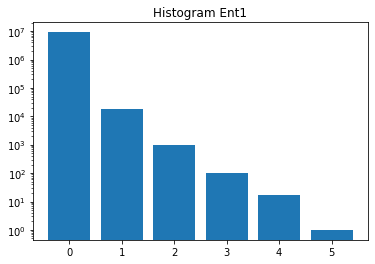

In [31]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram Ent1")
plt.show()

#### Dummy Entity 2

In [32]:
ent_2 = np.array(ent_2)
ent_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
hist = np.histogram(ent_2, bins=bins)
hist

(array([6119133,   12098,     688,      70,       9,       2]),
 array([0., 1., 2., 3., 4., 5., 6.]))

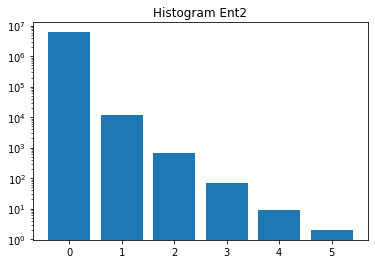

In [34]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram Ent2")
plt.show()

#### Create tensors for dummy entities

In [35]:
import torch

ent_1_tensor = torch.from_numpy(ent_1)
ent_2_tensor = torch.from_numpy(ent_2)

print(ent_1_tensor.size())
print(ent_2_tensor.size())

torch.Size([3000, 3066])
torch.Size([2000, 3066])


### Create dummy relations

In [36]:
data

HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278]
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)

We have 2 relations with 4278 and 12828 edges accordingly. We are going to use similar number of edges for the 2 dummy relations we are about to create, lets say 4278 and 8000 edges for (ent1, movie) and (ent2,movie).

#### 1st relation (4278 edges)

In [37]:
data[('movie', 'to', 'director')].edge_index

tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
        [ 789,  680, 1757,  ..., 1781,  166,  399]])

In [38]:
data[('director', 'to', 'movie')].edge_index

tensor([[   0,    1,    2,  ..., 2078, 2079, 2080],
        [3972, 3751, 3090,  ..., 3246, 3652, 4143]])

In [39]:
data[('movie', 'to', 'director')].edge_index.size()

torch.Size([2, 4278])

In [40]:
data[('director', 'to', 'movie')].edge_index.size()

torch.Size([2, 4278])

In [41]:
num_samples = data['movie'].x.size()[0]
num_samples

4278

In [48]:
movie_ent_1_1 = [i for i in range (num_samples)]

In [49]:
import random

movie_ent_1_2 = [random.randint(0, ent_1_len-1) for i in range (num_samples)]

In [50]:
movie_to_ent1 = [movie_ent_1_1, movie_ent_1_2]

Create reverse relation by sorting according to `ent_1_movie_2`

In [54]:
ent_1_movie_1 = [x for _, x in sorted(zip(ent_1_movie_2, ent_1_movie_1))]
ent_1_movie_2 = sorted(ent_1_movie_2)

In [57]:
ent1_to_movie = [ent_1_movie_2, ent_1_movie_1]

#### 2nd relation (8000 edges)

In [99]:
ent_2_movie_1 = [i for i in range (8000)]
ent_2_movie_2 = [i for i in range (num_samples)]
ent_2_movie_2.extend([random.randint(0, num_samples-1) for i in range (8000-num_samples)])
random.shuffle(ent_2_movie_2)


In [100]:
max(ent_2_movie_2)

4277

In [101]:
len(set(ent_2_movie_2))

4278

In [102]:
ent2_to_movie = [ent_2_movie_1, ent_2_movie_2]

In [103]:
movie_ent_2_1 = [x for _, x in sorted(zip(ent_2_movie_2, ent_2_movie_1))]
movie_ent_2_2 = sorted(ent_2_movie_2)

In [104]:
movie_to_ent2 = [movie_ent_2_2, movie_ent_2_1]

In [105]:
print(len(set(movie_ent_2_1)))
print(len(set(movie_ent_2_2)))

8000
4278


### Create tensors

In [106]:
data[('movie', 'to', 'director')].edge_index

tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
        [ 789,  680, 1757,  ..., 1781,  166,  399]])

In [109]:
data[('movie', 'to', 'director')].edge_index.size()

torch.Size([2, 4278])

Lists to Numpy arrays

In [108]:
movie_to_ent1 = np.array(movie_to_ent1)
ent1_to_movie = np.array(ent1_to_movie)
movie_to_ent2 = np.array(movie_to_ent2)
ent2_to_movie = np.array(ent2_to_movie)

print(movie_to_ent1.shape, ent1_to_movie.shape, movie_to_ent2.shape, ent2_to_movie.shape)

(2, 4278) (2, 4278) (2, 8000) (2, 8000)


Numpy arrays to Torch tensors

In [110]:
movie_to_ent1 = torch.from_numpy(movie_to_ent1)
ent1_to_movie = torch.from_numpy(ent1_to_movie)
movie_to_ent2 = torch.from_numpy(movie_to_ent2)
ent2_to_movie = torch.from_numpy(ent2_to_movie)

print(movie_to_ent1.size(), ent1_to_movie.size(), movie_to_ent2.size(), ent2_to_movie.size())

torch.Size([2, 4278]) torch.Size([2, 4278]) torch.Size([2, 8000]) torch.Size([2, 8000])


### Create dict and store it

In [114]:
dummies = {}
dummies[('movie', 'to', 'ent1')] = movie_to_ent1
dummies[('movie', 'to', 'ent2')] = movie_to_ent2
dummies[('ent1', 'to', 'movie')] = ent1_to_movie
dummies[('ent2', 'to', 'movie')] = ent2_to_movie

In [115]:
dummies

{('movie',
  'to',
  'ent1'): tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
         [1946, 1556,  655,  ..., 1863, 1983, 1055]]),
 ('movie',
  'to',
  'ent2'): tensor([[   0,    0,    0,  ..., 4277, 4277, 4277],
         [2061, 2417, 4312,  ..., 2463, 2487, 7735]]),
 ('ent1',
  'to',
  'movie'): tensor([[   0,    3,    5,  ..., 2999, 2999, 2999],
         [2608, 3185, 1301,  ..., 1635, 2484, 3770]]),
 ('ent2',
  'to',
  'movie'): tensor([[   0,    1,    2,  ..., 7997, 7998, 7999],
         [1330, 2427, 1360,  ...,  818, 1887, 3133]])}

In [117]:
datapath = './data/dummies/'

os.path.join(datapath, 'imdb.pkl')

'./data/dummies/imdb.pkl'

In [119]:
import pickle
import os

datapath = './data/dummies/'

with open(os.path.join(datapath, 'imdb.pkl'), 'wb') as f:
    pickle.dump(dummies, f, protocol=pickle.HIGHEST_PROTOCOL)

## DBLP dataset

### Import data

In [1]:
from torch_geometric.datasets import DBLP

dataset = DBLP(root='./data/dblp')

In [2]:
print('Dataset:', dataset)

print('Number of graphs:', len(dataset))

data = dataset[0]
print(data)

num_classes = len(data['author'].y.unique())
print('Number of classes:', num_classes)
print('Classes:', data['author'].y.unique())

Dataset: DBLP()
Number of graphs: 1
HeteroData(
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057]
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={ num_nodes=20 },
  (author, to, paper)={ edge_index=[2, 19645] },
  (paper, to, author)={ edge_index=[2, 19645] },
  (paper, to, term)={ edge_index=[2, 85810] },
  (paper, to, conference)={ edge_index=[2, 14328] },
  (term, to, paper)={ edge_index=[2, 85810] },
  (conference, to, paper)={ edge_index=[2, 14328] }
)
Number of classes: 4
Classes: tensor([0, 1, 2, 3])


### Author

In [3]:
data['author'].x.unique()

tensor([0., 1.])

In [4]:
data['author'].x.unique().size()

torch.Size([2])

In [5]:
arr = data['author'].x.detach().numpy()
arr

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
bins = data['author'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0, 1.0, 2.0]

In [7]:
import numpy as np

hist_author = np.histogram(arr, bins=bins)
hist_author

(array([1306228,   48810]), array([0., 1., 2.]))

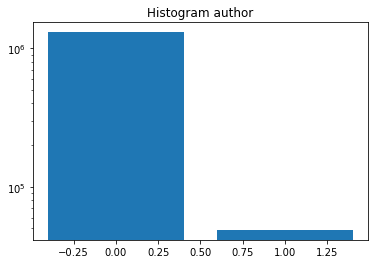

In [8]:
import matplotlib.pyplot as plt

_ = plt.bar(hist_author[1][:-1], hist_author[0], log=True)
plt.title("Histogram author")
plt.show()

### Paper

In [9]:
data['paper'].x.unique()

tensor([0., 1., 2., 3., 4., 5.])

In [10]:
arr = data['paper'].x.detach().numpy()
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
bins = data['paper'].x.unique().tolist()
bins.append(bins[-1]+1)
bins

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [12]:
import numpy as np

hist = np.histogram(arr, bins=bins)
hist

(array([60526738,    94131,      871,       24,        3,        1]),
 array([0., 1., 2., 3., 4., 5., 6.]))

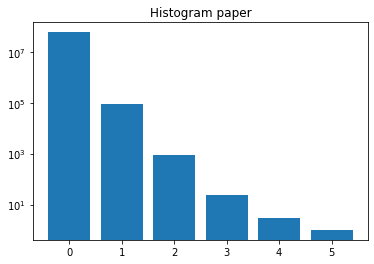

In [13]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram paper")
plt.show()

### Term

In [14]:
data['term'].x.unique()

tensor([-3.1392, -2.9321, -2.9224,  ...,  4.0270,  4.0882,  4.1452])

In [15]:
len(data['term'].x.unique())

179995

In [16]:
arr = data['term'].x.detach().numpy()
arr

array([[-0.69241 , -0.46592 ,  1.154   , ...,  0.91784 ,  0.19945 ,
        -0.63601 ],
       [ 1.2031  , -0.40028 ,  0.073991, ...,  1.3262  , -0.33245 ,
         0.8198  ],
       [ 0.37481 ,  0.57314 ,  0.48017 , ...,  1.1522  ,  0.60099 ,
        -0.43094 ],
       ...,
       [ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.17239 , -0.27227 , -1.3368  , ..., -0.088101,  0.02252 ,
         0.1166  ],
       [ 0.21966 ,  0.025267,  0.12204 , ...,  0.087148, -0.53515 ,
        -0.49489 ]], dtype=float32)

In [17]:
import numpy as np

hist = np.histogram(arr, bins=6)
hist

(array([   506,  42063, 271113,  67252,   3266,   1950]),
 array([-3.1392   , -1.9251333, -0.7110667,  0.5029999,  1.7170665,
         2.9311333,  4.1452   ], dtype=float32))

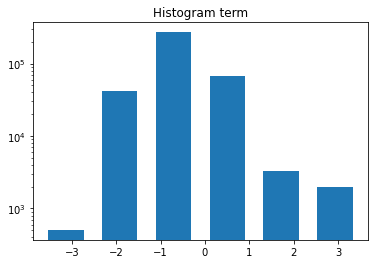

In [19]:
import matplotlib.pyplot as plt

_ = plt.bar(hist[1][:-1], hist[0], log=True)
plt.title("Histogram term")
plt.show()

### Create dummy entities

We are going to use the same entities as IMDB dataset since the range of the values is similar.

### Create dummy relations

### Create tensors

In [ ]:
data[('movie', 'to', 'director')].edge_index

tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
        [ 789,  680, 1757,  ..., 1781,  166,  399]])

In [ ]:
data[('movie', 'to', 'director')].edge_index.size()

torch.Size([2, 4278])

Lists to Numpy arrays

In [ ]:
movie_to_ent1 = np.array(movie_to_ent1)
ent1_to_movie = np.array(ent1_to_movie)
movie_to_ent2 = np.array(movie_to_ent2)
ent2_to_movie = np.array(ent2_to_movie)

print(movie_to_ent1.shape, ent1_to_movie.shape, movie_to_ent2.shape, ent2_to_movie.shape)

(2, 4278) (2, 4278) (2, 8000) (2, 8000)


Numpy arrays to Torch tensors

In [ ]:
movie_to_ent1 = torch.from_numpy(movie_to_ent1)
ent1_to_movie = torch.from_numpy(ent1_to_movie)
movie_to_ent2 = torch.from_numpy(movie_to_ent2)
ent2_to_movie = torch.from_numpy(ent2_to_movie)

print(movie_to_ent1.size(), ent1_to_movie.size(), movie_to_ent2.size(), ent2_to_movie.size())

torch.Size([2, 4278]) torch.Size([2, 4278]) torch.Size([2, 8000]) torch.Size([2, 8000])


### Create dict and store it

In [ ]:
dummies = {}
dummies[('movie', 'to', 'ent1')] = movie_to_ent1
dummies[('movie', 'to', 'ent2')] = movie_to_ent2
dummies[('ent1', 'to', 'movie')] = ent1_to_movie
dummies[('ent2', 'to', 'movie')] = ent2_to_movie

In [ ]:
dummies

{('movie',
  'to',
  'ent1'): tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
         [1946, 1556,  655,  ..., 1863, 1983, 1055]]),
 ('movie',
  'to',
  'ent2'): tensor([[   0,    0,    0,  ..., 4277, 4277, 4277],
         [2061, 2417, 4312,  ..., 2463, 2487, 7735]]),
 ('ent1',
  'to',
  'movie'): tensor([[   0,    3,    5,  ..., 2999, 2999, 2999],
         [2608, 3185, 1301,  ..., 1635, 2484, 3770]]),
 ('ent2',
  'to',
  'movie'): tensor([[   0,    1,    2,  ..., 7997, 7998, 7999],
         [1330, 2427, 1360,  ...,  818, 1887, 3133]])}

In [ ]:
datapath = './data/dummies/'

os.path.join(datapath, 'imdb.pkl')

'./data/dummies/imdb.pkl'

In [ ]:
import pickle
import os

datapath = './data/dummies/'

with open(os.path.join(datapath, 'imdb.pkl'), 'wb') as f:
    pickle.dump(dummies, f, protocol=pickle.HIGHEST_PROTOCOL)